In [7]:
from sklearn.datasets import load_iris
import numpy as np
import random
from MulticlassClassification import MulticlassClassification
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from LinearDiscriminantAnalysis import LDA
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [8]:
if __name__ == "__main__":

    # set this to False to make test cases / training set non-random
    randomness_allowed = True

    iris = load_iris()
    X = iris.data
    Y = iris.target

    classes = [c for c in np.unique(Y)]
    n = int(0.1*X.shape[0]/len(classes))

    all_test_indices = []
    for c in classes:
        c_indices = np.where(Y == c)[0].tolist()

        if (randomness_allowed):
            c_indices = sorted(c_indices, key=(
                lambda x: x - random.randint(-1000, 1000)))
        all_test_indices = all_test_indices + c_indices[:n]

    test_X = X[all_test_indices]
    test_Y = Y[all_test_indices]

    mask = np.ones(X.shape[0], dtype=bool)
    mask[all_test_indices] = False
    train_X = X[mask]
    train_Y = Y[mask]

# data is now evenly split according to 1.1



Expected target values  [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2] 

MODEL-1: Logistic Regression - features # sepal length / width
Predictions [0 0 0 0 0 1 2 1 2 2 2 2 2 2 2]
Accuracy - model1: 0.8 

MODEL-1-LDA: features # sepal length / width
Predictions [0 0 0 0 0 1 2 1 2 2 2 2 2 2 2]
Accuracy - model1_LDA: 0.8 

MODEL-2: Logistic Regression - features # petal length / width
Predictions [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
Accuracy - model2: 1.0 

MODEL-2-LDA: features # petal length / width
Predictions [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
Accuracy - model2_LDA: 1.0 

Model-3: Logistic Regression-  all features
Predictions [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
Accuracy - model3: 1.0 

Model-3: LDA - all features
Predictions [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
Accuracy - model3_LDA: 1.0 



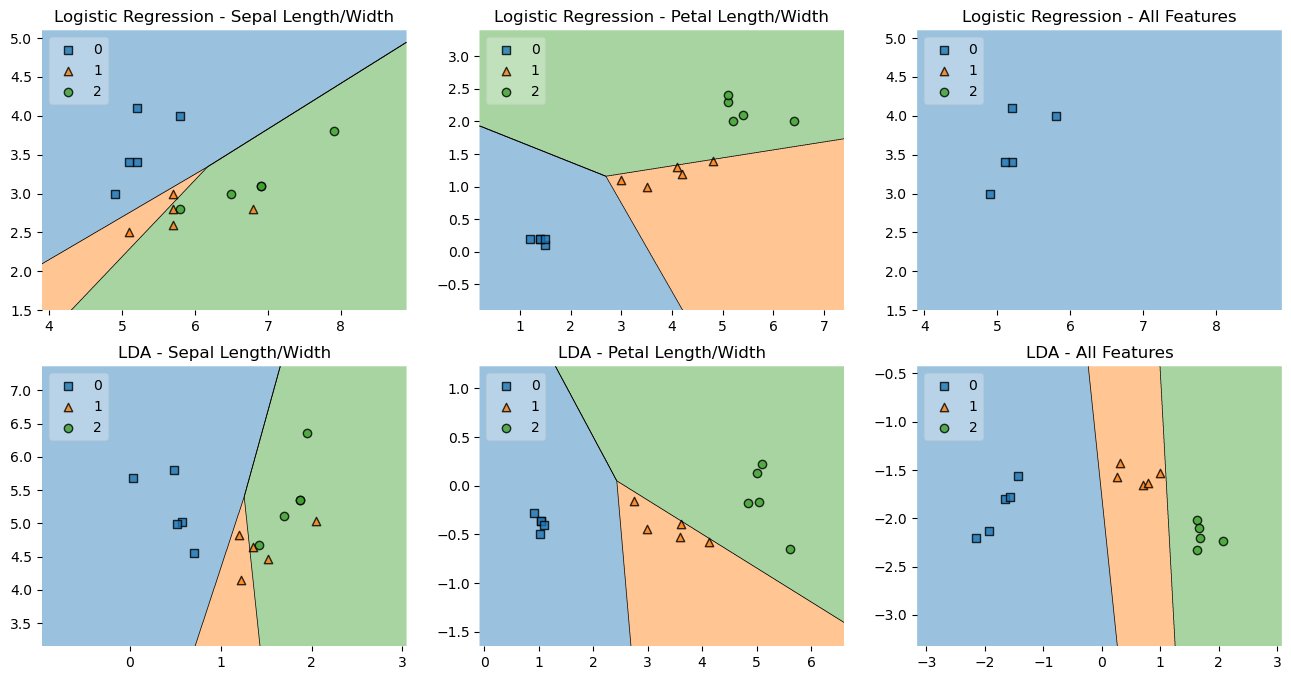

In [9]:

    print("\nExpected target values ", test_Y, "\n")

    # sepal length / width
    print("MODEL-1: Logistic Regression - features # sepal length / width")
    model1 = MulticlassClassification(learning_rate=0.05, max_epochs=1000)
    model1.fit(train_X[:, :2], train_Y)
    print("Predictions", model1.predict(test_X[:, :2]))
    print("Accuracy - model1:", accuracy_score(test_Y,
          model1.predict(test_X[:, :2])), "\n")

    print("MODEL-1-LDA: features # sepal length / width")
    model1_LDA = LDA(n_components=2)
    model1_LDA.fit(train_X[:, :2], train_Y)
    predictions = model1_LDA.predict(test_X[:, :2], transformed=False)
    print("Predictions", predictions)
    print("Accuracy - model1_LDA:", accuracy_score(test_Y, predictions), "\n")

    # petal length / width
    print("MODEL-2: Logistic Regression - features # petal length / width")
    model2 = MulticlassClassification(learning_rate=0.05, max_epochs=1000)
    model2.fit(train_X[:, -2:], train_Y)
    print("Predictions", model2.predict(test_X[:, -2:]))
    print("Accuracy - model2:", accuracy_score(test_Y,
          model2.predict(test_X[:, -2:])), "\n")

    # petal length / width
    print("MODEL-2-LDA: features # petal length / width")
    model2_LDA = LDA(n_components=2)
    model2_LDA.fit(train_X[:, -2:], train_Y)
    predictions = model2_LDA.predict(test_X[:, -2:], transformed=False)
    print("Predictions", predictions)
    print("Accuracy - model2_LDA:", accuracy_score(test_Y, predictions), "\n")

    # all features
    print("Model-3: Logistic Regression-  all features")
    model3 = MulticlassClassification(learning_rate=0.05, max_epochs=1000)
    model3.fit(train_X, train_Y)
    print("Predictions", model3.predict(test_X))
    print("Accuracy - model3:", accuracy_score(test_Y, model3.predict(test_X)), "\n")

    print("Model-3: LDA - all features")
    model3_LDA = LDA(n_components=2)
    model3_LDA.fit(train_X, train_Y)
    predictions = model3_LDA.predict(test_X, transformed=False)
    print("Predictions", predictions)
    print("Accuracy - model3_LDA:", accuracy_score(test_Y, predictions), "\n")

    # Plotting Decision Regions
    gs = gridspec.GridSpec(2, 3)
    fig = plt.figure(figsize=(16, 8))
    value = 1
    width = 1

    for clf, lab, grd, test_set in zip([model1, model1_LDA, model2, model2_LDA, model3, model3_LDA],
                                       ['Logistic Regression - Sepal Length/Width', 'LDA - Sepal Length/Width',
                                           'Logistic Regression - Petal Length/Width', 'LDA - Petal Length/Width',
                                           'Logistic Regression - All Features', 'LDA - All Features'
                                        ],
                                       [(0, 0), (1, 0), (0, 1),
                                        (1, 1), (0, 2), (1, 2)],

                                       [test_X[:, :2], model1_LDA.transform(test_X[:, :2]),
                                        test_X[:, -
                                               2:], model2_LDA.transform(test_X[:, -2:]),
                                        test_X, model3_LDA.transform(test_X)
                                        ]
                                       ):
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=test_set, y=test_Y, clf=clf, legend=2,
                                    filler_feature_values={
                                        2: value, 3: value},
                                    filler_feature_ranges={
                                        2: width, 3: width},
                                    feature_index=[0, 1]
                                    ),

        plt.title(lab)
    plt.show()
